In [32]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# Dataframe cleaning

In [33]:
def team_features(df):
    df["avg_rank_blue_team"] = df[["rank_player_1", "rank_player_2", "rank_player_3", "rank_player_4", "rank_player_5"]].mean(axis=1)
    df["avg_rank_red_team"] = df[["rank_player_6", "rank_player_7", "rank_player_8", "rank_player_9", "rank_player_10"]].mean(axis=1)
    df["avg_winrate_blue_team"] = df[["winrate_player_1", "winrate_player_2", "winrate_player_3", "winrate_player_4", "winrate_player_5"]].mean(axis=1)
    df["avg_winrate_red_team"] = df[["winrate_player_6", "winrate_player_7", "winrate_player_8", "winrate_player_9", "winrate_player_10"]].mean(axis=1)
    df["avg_kda_blue_team"] = df[["mean_kda_player_1", "mean_kda_player_2", "mean_kda_player_3", "mean_kda_player_4", "mean_kda_player_5"]].mean(axis=1)
    df["avg_kda_red_team"] = df[["mean_kda_player_6", "mean_kda_player_7", "mean_kda_player_8", "mean_kda_player_9", "mean_kda_player_10"]].mean(axis=1)
    df["avg_gpm_blue_team"] = df[["mean_gpm_player_1", "mean_gpm_player_2", "mean_gpm_player_3", "mean_gpm_player_4", "mean_gpm_player_5"]].mean(axis=1)
    df["avg_gpm_red_team"] = df[["mean_gpm_player_6", "mean_gpm_player_7", "mean_gpm_player_8", "mean_gpm_player_9", "mean_gpm_player_10"]].mean(axis=1)
    df["avg_cs_blue_team"] = df[["mean_cs_player_1", "mean_cs_player_2", "mean_cs_player_3", "mean_cs_player_4", "mean_cs_player_5"]].mean(axis=1)
    df["avg_cs_red_team"] = df[["mean_cs_player_6", "mean_cs_player_7", "mean_cs_player_8", "mean_cs_player_9", "mean_cs_player_10"]].mean(axis=1)
    df["nb_autofill_blue_team"] = df[["autofill_player_1", "autofill_player_2", "autofill_player_3", "autofill_player_4", "autofill_player_5"]].sum(axis=1)
    df["nb_autofill_red_team"] = df[["autofill_player_6", "autofill_player_7", "autofill_player_8", "autofill_player_9", "autofill_player_10"]].sum(axis=1)
    return df

In [34]:
df = pd.read_csv("match_data.csv")
df = df.dropna()
df = team_features(df)
df = df[["avg_rank_blue_team", "avg_rank_red_team", "avg_winrate_blue_team",
        "avg_winrate_red_team", "avg_kda_blue_team", "avg_kda_red_team",
            "avg_gpm_blue_team", "avg_gpm_red_team", "avg_cs_blue_team",
                "avg_cs_red_team", "nb_autofill_blue_team", "nb_autofill_red_team", "win"]] 

In [35]:
df.head()

,avg_rank_blue_team,avg_rank_red_team,avg_winrate_blue_team,avg_winrate_red_team,win
0,13.20,12.20,0.48,0.52,1
1,12.40,11.60,0.49,0.44,1
2,9.20,11.40,0.49,0.47,-1
3,13.60,14.80,0.48,0.49,-1
4,24.20,24.40,0.52,0.54,1


# Features correlation

<AxesSubplot: >

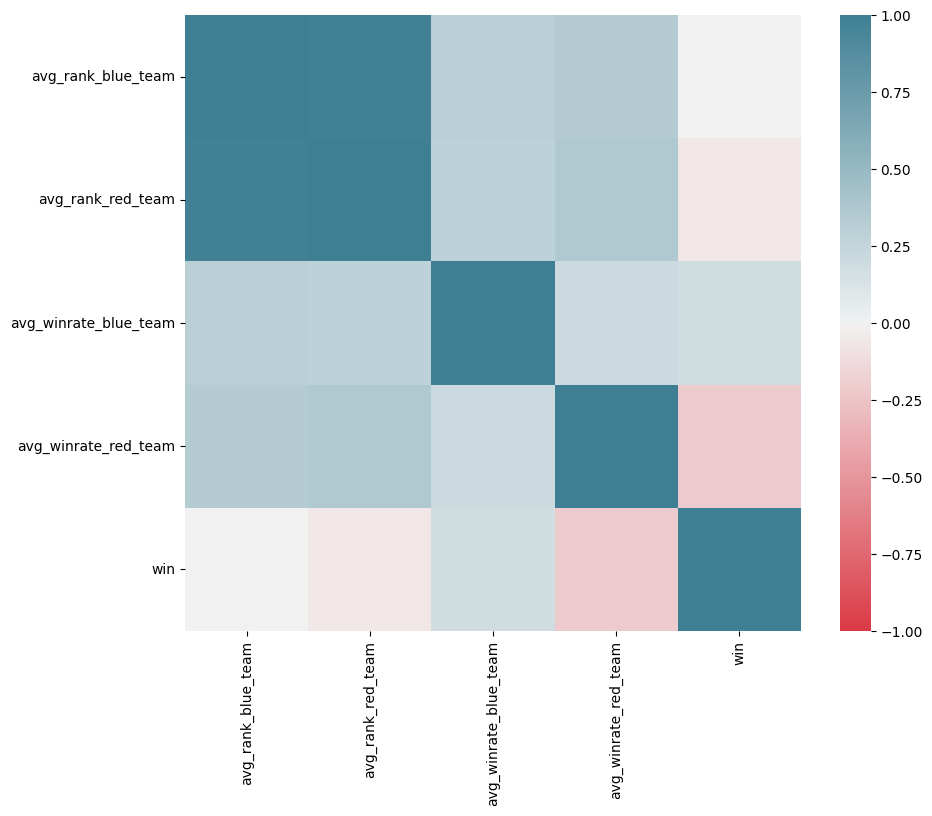

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(10, 220, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# Model selection

In [37]:
X = df.loc[:, df.columns!= "win"]
y = df[["win"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 13.02it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.67,0.67,0.67,0.67,0.02
RidgeClassifier,0.67,0.67,0.67,0.67,0.03
LinearDiscriminantAnalysis,0.67,0.66,0.66,0.67,0.03
LinearSVC,0.66,0.66,0.66,0.66,0.03
CalibratedClassifierCV,0.66,0.66,0.66,0.66,0.13
LogisticRegression,0.65,0.65,0.65,0.65,0.04
QuadraticDiscriminantAnalysis,0.66,0.65,0.65,0.65,0.02
AdaBoostClassifier,0.64,0.64,0.64,0.64,0.25
SVC,0.64,0.64,0.64,0.64,0.15


According to lazypredict, the LogisticRegression is the most suitable classifier for our case.
Let's try it:

In [38]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
model.fit(X_train, y_train)
print("Accuracy of the logistic regression : " + str(accuracy_score(y_test, model.predict(X_test))))

Accuracy of the logistic regression : 0.6628151260504201


In [39]:
pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X.columns)

,coeff
avg_rank_blue_team,0.54
avg_rank_red_team,-0.57
avg_winrate_blue_team,18.49
avg_winrate_red_team,-18.42


In [40]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Thus, the winrate seems to be the most impactful variable. 
While the coefficient related to nb_autofill_blue is of the wrong sign.